In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

import sys
import os
import math
import copy
from collections import OrderedDict

import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import healpy as hp
import pymaster as nmt
import pyccl as ccl
from tqdm.notebook import tqdm
from scipy.integrate import simps

sys.path.append('..')
from utils import get_config, get_normalized_dist
from data_lotss import get_lotss_redshift_distribution, get_skads_sim_data
from experiment import Experiment, show_mcmc_report, run_experiments
from plotting import my_mollview, plot_correlation_matrix, plot_correlation, plot_many_data_correlations

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
sns.set(style='ticks')
pd.set_option('mode.chained_assignment', None)

# Run experiment

In [4]:
config = get_config('LoTSS_DR2')
display(config)

{'lss_survey_name': 'LoTSS_DR2',
 'is_optical': False,
 'lss_mask_name': 'Mask_coverage',
 'flux_min_cut': 2,
 'nside': 512,
 'z_tail': 1.3,
 'bias': 1.4,
 'scale_bias': True,
 'cosmology_name': 'planck',
 'cosmology_matter_power_spectrum': 'halofit',
 'correlation_symbols': ['gg', 'gt'],
 'l_max': {'gg': 36, 'gt': 36},
 'ells_per_bin': {'gg': 16, 'gt': 16},
 'starting_params': {'bias': [2.1, 0.5], 'sigma8': [0.83, 0.1]},
 'n_walkers': 32,
 'max_iterations': 5000,
 'continue_sampling': False}

In [5]:
experiment = Experiment(config, set_data=True, set_maps=True)

Original LoTSS DR2 datashape: (4395448, 24)
Total flux of S > 2 mJy: (1062278, 24)


/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 256
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format

In [6]:
experiment.set_correlations()

data correlations:   0%|          | 0/2 [00:00<?, ?it/s]

covariance matrices:   0%|          | 0/3 [00:00<?, ?it/s]

# gT: sigmas

In [7]:
# coverage, 2 mJy, l < 32
experiment.print_correlation_statistics()

C_gg sigma: 26.77
C_gg chi squared: 2743.35
C_gt sigma: 1.86
C_gt chi squared: 3.46


In [7]:
# coverage, 1 mJy, l < 32
experiment.print_correlation_statistics()

C_gg sigma: 74.67
C_gg chi squared: 231734.19
C_gt sigma: 4.68
C_gt chi squared: 45.24


In [8]:
# 75 percent, 2 mJy, l < 32
experiment.print_correlation_statistics()

C_gg sigma: 18.27
C_gg chi squared: 732.34
C_gt sigma: 1.62
C_gt chi squared: 0.14


In [7]:
# 75 percent, 1 mJy, l < 32
experiment.print_correlation_statistics()

C_gg sigma: 33.78
C_gg chi squared: 9409.65
C_gt sigma: 1.29
C_gt chi squared: 4.57


In [7]:
# 75 percent, 0.5 mJy, l < 32
experiment.print_correlation_statistics()

C_gg sigma: 96.56
C_gg chi squared: 1270439.20
C_gt sigma: 3.83
C_gt chi squared: 42.83


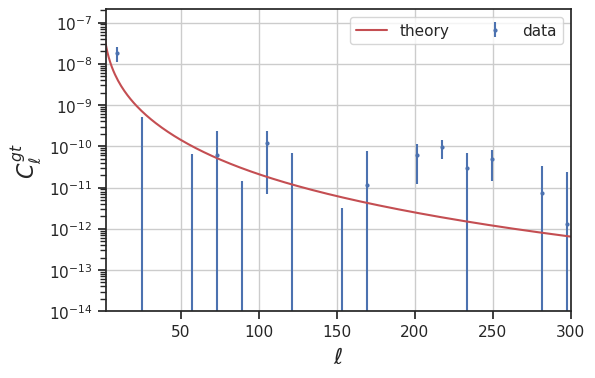

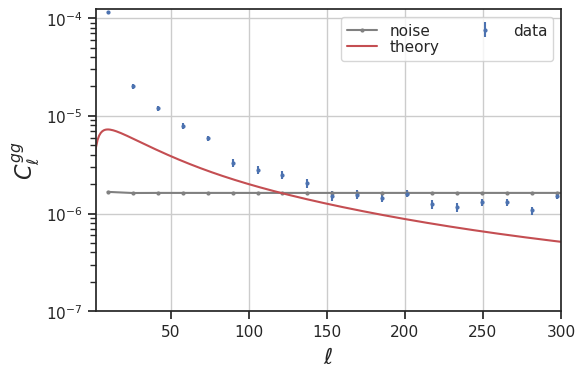

In [7]:
# coverage, 2 mJy, l < 32
plot_correlation(experiment, 'gt', x_min=2, x_max=300, y_min=1e-14, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=300, y_min=1e-7, y_max=None, x_scale='linear', y_scale='log')

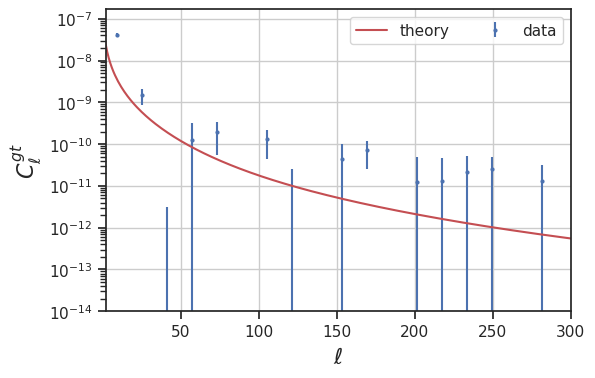

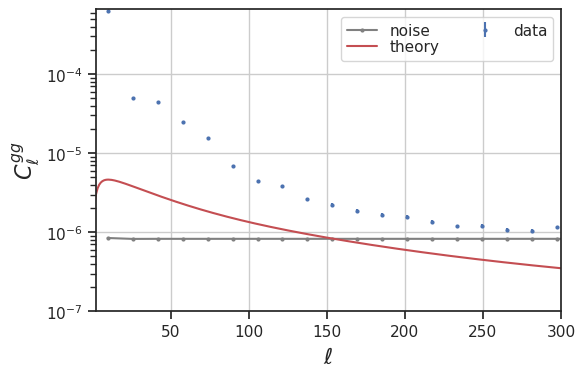

In [8]:
# coverage, 1 mJy, l < 32
plot_correlation(experiment, 'gt', x_min=2, x_max=300, y_min=1e-14, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=300, y_min=1e-7, y_max=None, x_scale='linear', y_scale='log')

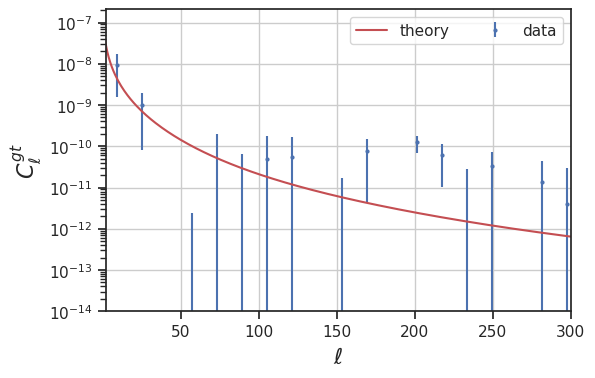

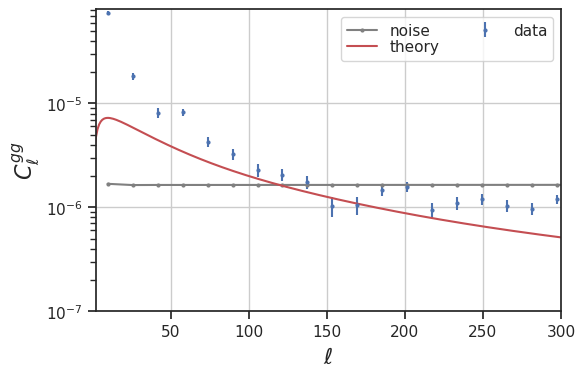

In [9]:
# 75 percent, 2 mJy, l < 32
plot_correlation(experiment, 'gt', x_min=2, x_max=300, y_min=1e-14, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=300, y_min=1e-7, y_max=None, x_scale='linear', y_scale='log')

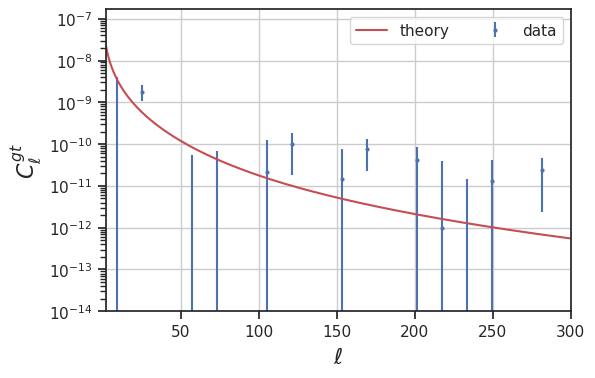

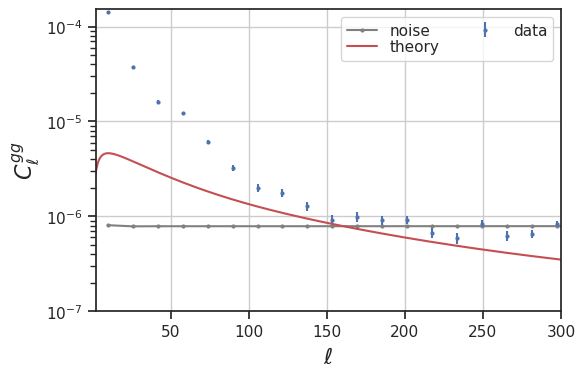

In [8]:
# 75 percent, 1 mJy, l < 32
plot_correlation(experiment, 'gt', x_min=2, x_max=300, y_min=1e-14, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=300, y_min=1e-7, y_max=None, x_scale='linear', y_scale='log')

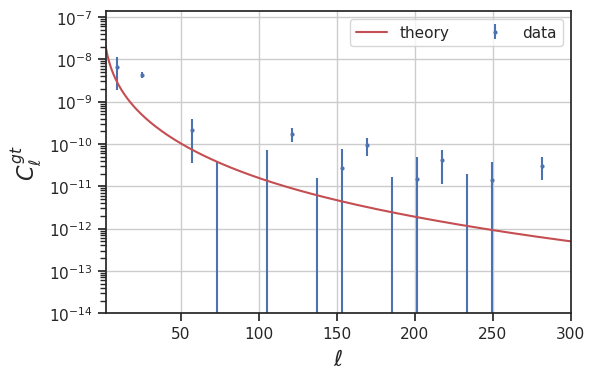

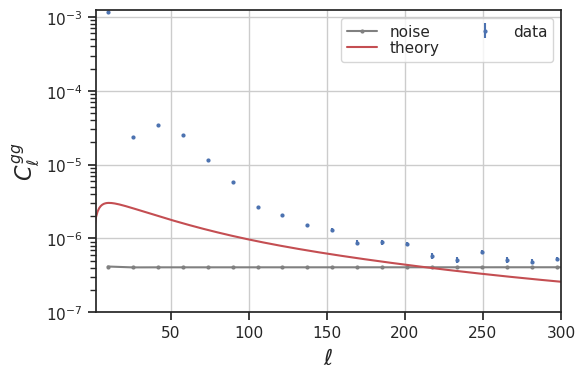

In [8]:
# 75 percent, 0.5 mJy, l < 32
plot_correlation(experiment, 'gt', x_min=2, x_max=300, y_min=1e-14, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=300, y_min=1e-7, y_max=None, x_scale='linear', y_scale='log')

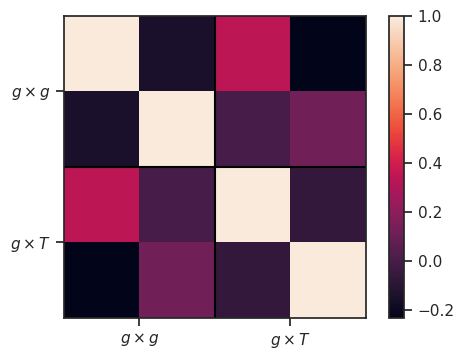

In [9]:
# coverage, 1 mJy, l < 32
plot_correlation_matrix(experiment)

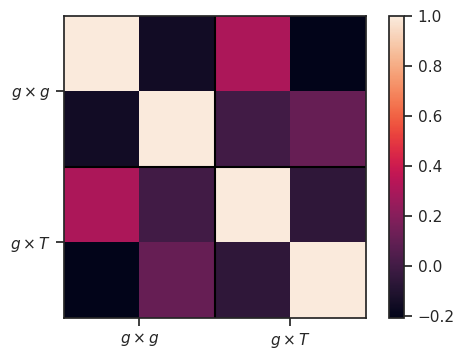

In [8]:
# 75 percent, 2 mJy, l < 32
plot_correlation_matrix(experiment)

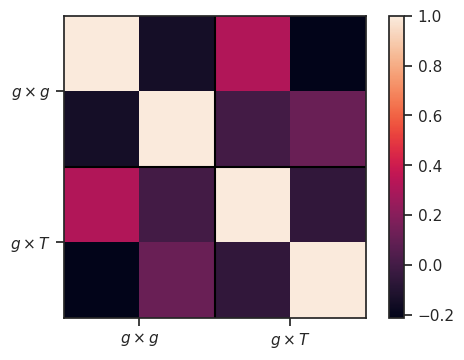

In [9]:
# 75 percent, 1 mJy, l < 32
plot_correlation_matrix(experiment)

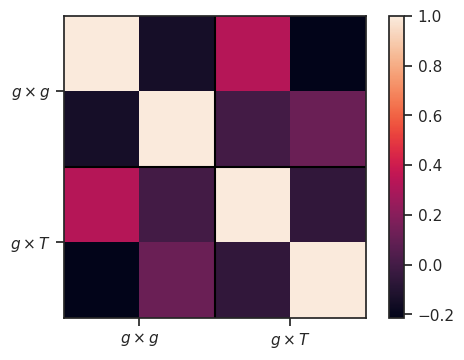

In [9]:
# 75 percent, 0.5 mJy, l < 32
plot_correlation_matrix(experiment)

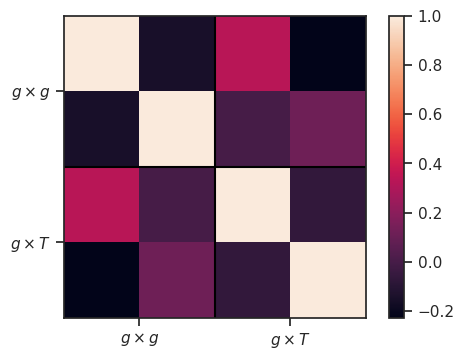

In [8]:
# coverage, 2 mJy, l < 32
plot_correlation_matrix(experiment)

# gk: sigmas

params:
- 2 mJy: z tail 1.3, bias 1.4
- 1 mJy: z tail 1.4, bias 1.2
- 0.5 mJy: z tail 1.6, bias 1.1

In [7]:
# coverage, 2 mJy, l < 500
experiment.print_correlation_statistics()

C_gg sigma: 138.03
C_gg chi squared: 3073.40
C_gk sigma: 20.48
C_gk chi squared: 20.84


In [7]:
# 75 percent, 2 mJy, l < 500
experiment.print_correlation_statistics()

C_gg sigma: 110.17
C_gg chi squared: 859.73
C_gk sigma: 17.82
C_gk chi squared: 20.83


In [11]:
# 75 percent, 1 mJy, l < 500
experiment.print_correlation_statistics()

C_gg sigma: 120.86
C_gg chi squared: 11715.64
C_gk sigma: 21.57
C_gk chi squared: 36.57


In [8]:
# 75 percent, 0.5 mJy, l < 500
experiment.print_correlation_statistics()

C_gg sigma: 193.88
C_gg chi squared: 1092233.67
C_gk sigma: 23.15
C_gk chi squared: 123.96


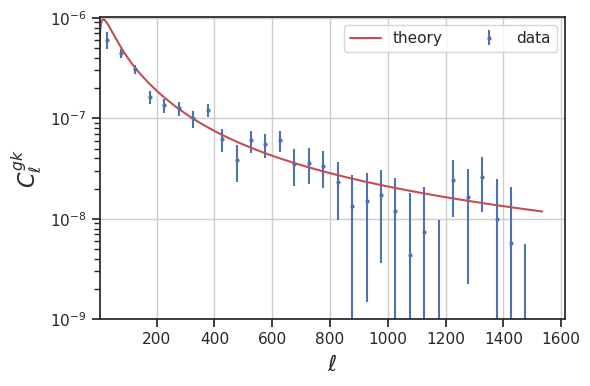

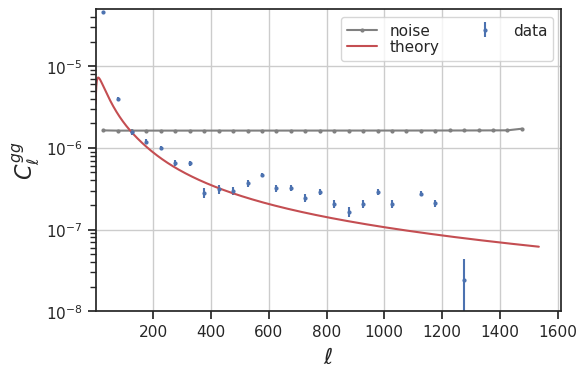

In [8]:
# coverage, 2 mJy, l < 500
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

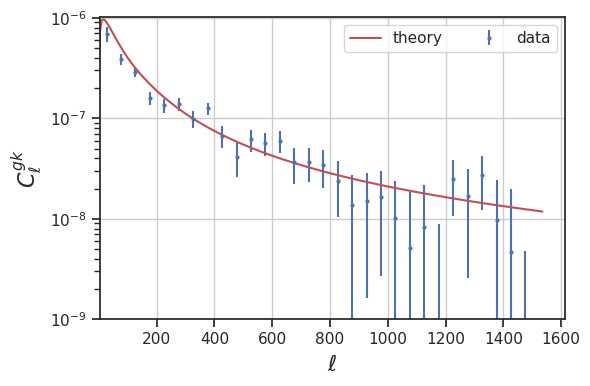

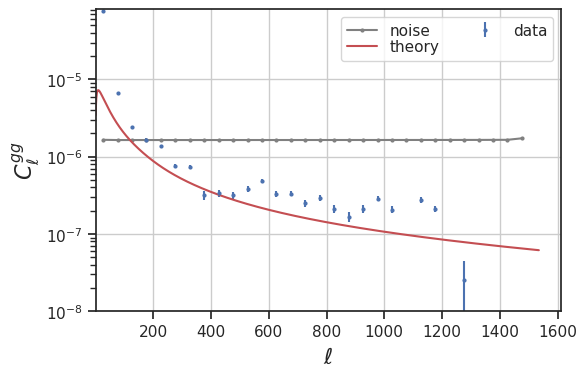

In [7]:
# coverage, 2 mJy, l < 500, no probability mask
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

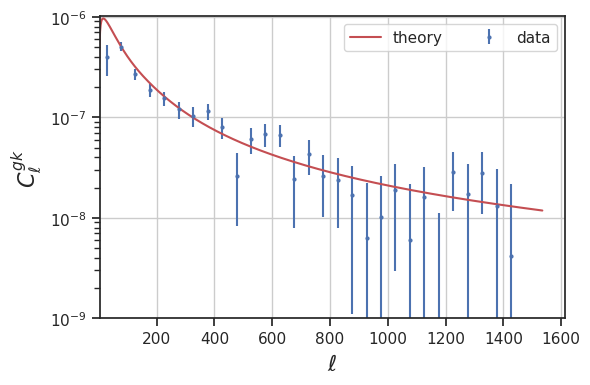

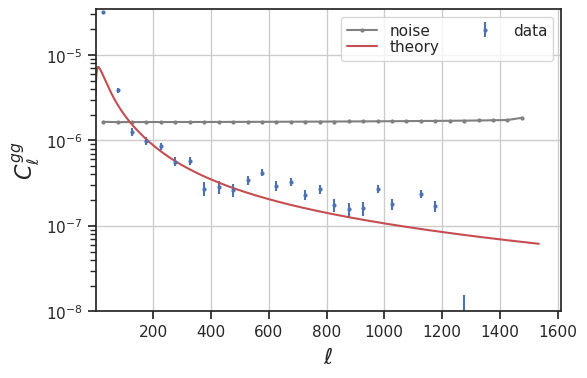

In [11]:
# noise 75 percent, 2 mJy, l < 500
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

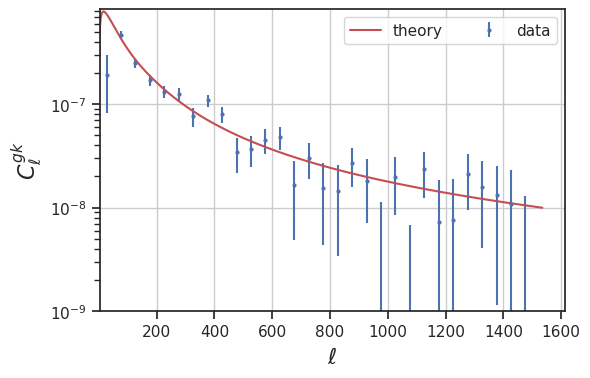

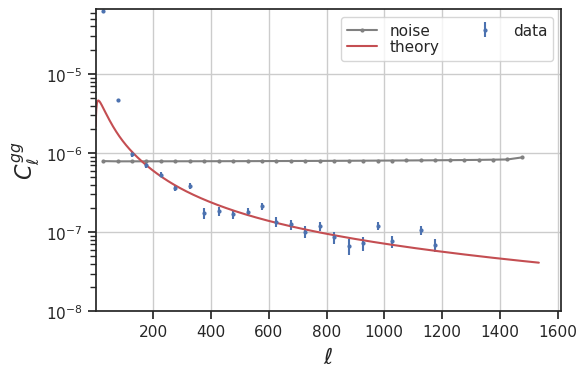

In [10]:
# noise 75 percent, 1 mJy, l < 500
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

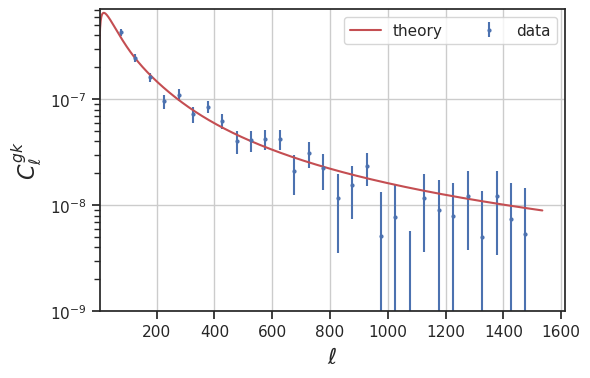

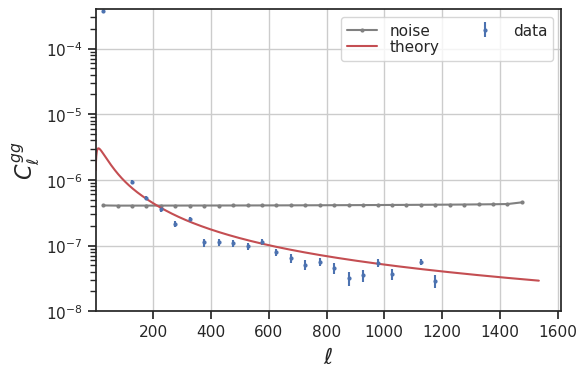

In [7]:
# noise 75 percent, 0.5 mJy, l < 500
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

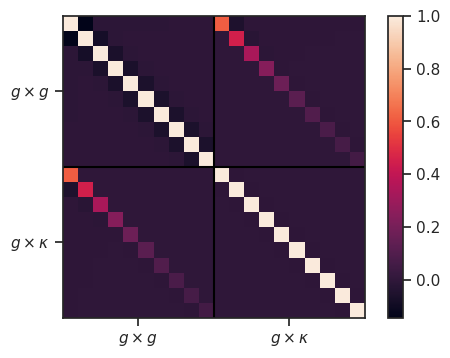

In [12]:
# 75 percent, 2 mJy, l < 500
plot_correlation_matrix(experiment)

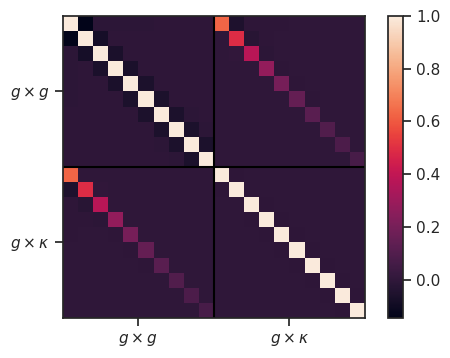

In [9]:
# 75 percent, 1 mJy, l < 500
plot_correlation_matrix(experiment)

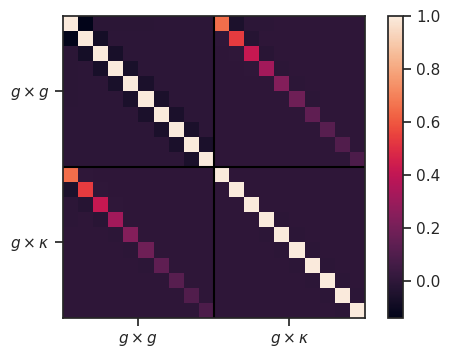

In [9]:
# 75 percent, 0.5 mJy, l < 500
plot_correlation_matrix(experiment)

# gk: masks

In [5]:
params_to_update = {
    'lss_mask_name': ['Mask_coverage', 'Mask_default', 'Mask_noise_99percent', 'Mask_noise_75percent', 'Mask_noise_median'],
}
experiments = run_experiments(config, params_to_update, recalculate_data=False, recalculate_maps=True, with_covariance=False)

Original LoTSS DR2 datashape: (4395448, 24)
Total flux of S > 2 mJy: (1062278, 24)


  0%|          | 0/5 [00:00<?, ?it/s]

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 256
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format

data correlations:   0%|          | 0/2 [00:00<?, ?it/s]

data correlations:   0%|          | 0/2 [00:00<?, ?it/s]

data correlations:   0%|          | 0/2 [00:00<?, ?it/s]

data correlations:   0%|          | 0/2 [00:00<?, ?it/s]

data correlations:   0%|          | 0/2 [00:00<?, ?it/s]

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  **kwds
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:543: UserWarning: 0.0 180.0 -180.0 180.0
  pmin / dtor, pmax / dtor, mmin / dtor, mmax / dtor
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:658: UserWarning: The interval between parallels is 30 deg -0.00'.
  vdeg, varcmin
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:666: UserWarning: The interval between meridians is 30 deg -0.00'.
  vdeg, varcmin


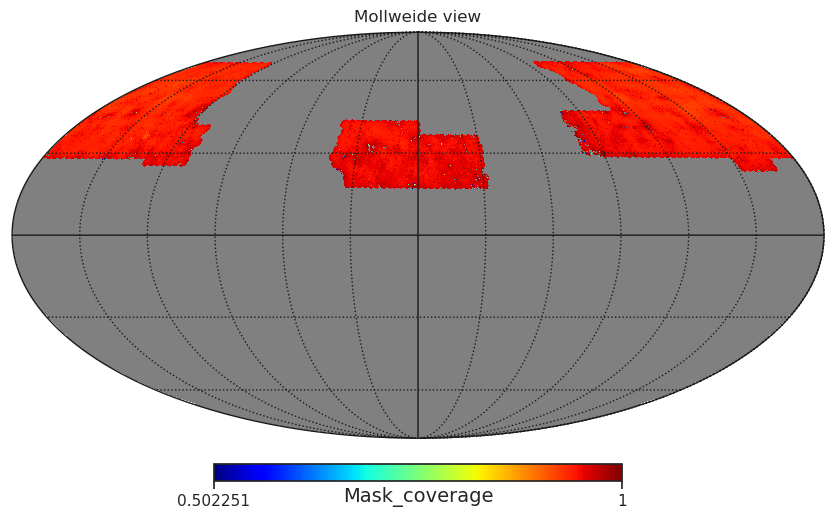

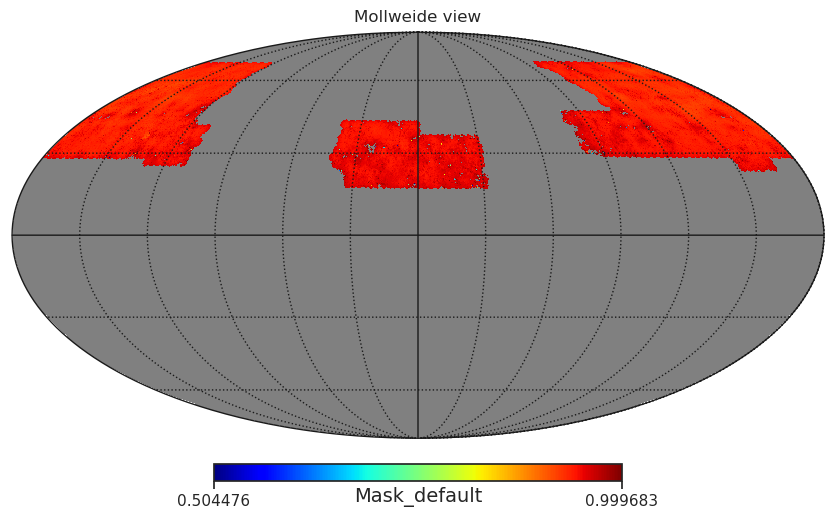

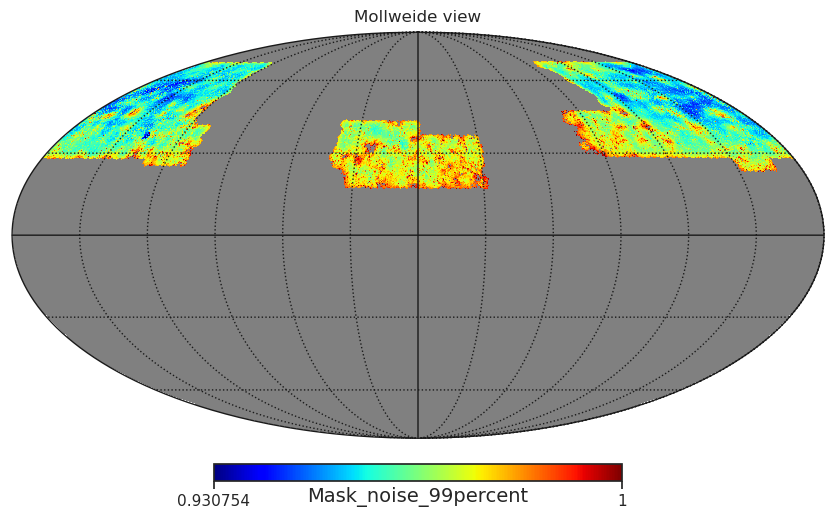

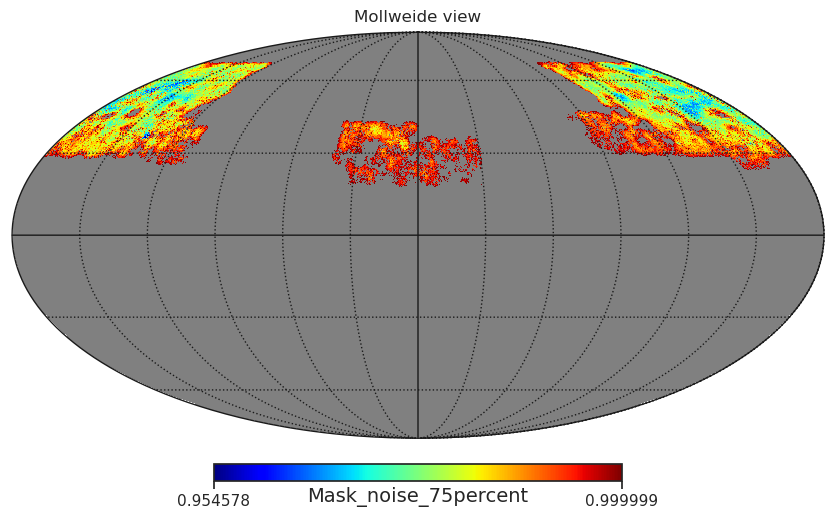

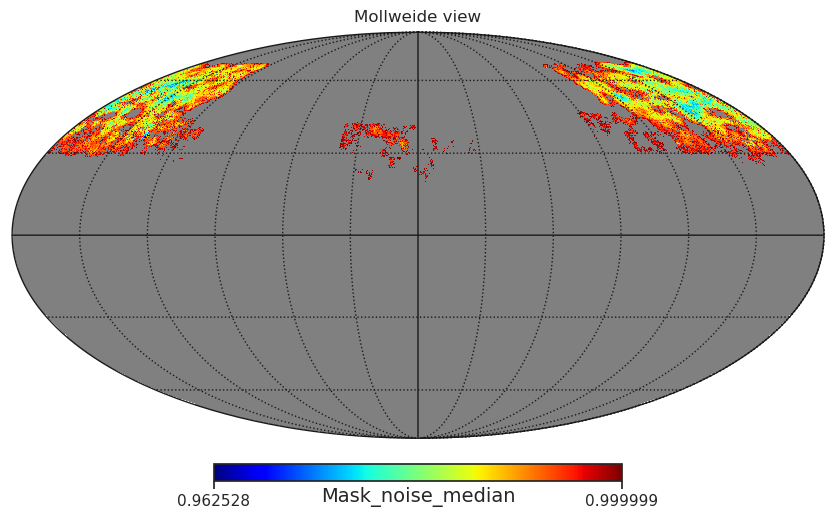

In [7]:
for mask_name, experiment in experiments.items():
    my_mollview(experiment.masks['g'], unit=mask_name)

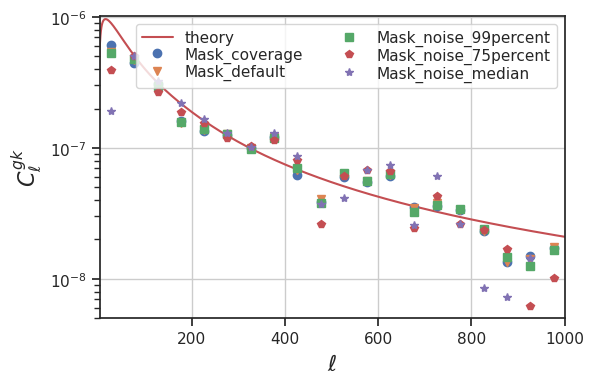

In [12]:
plot_many_data_correlations(experiments, 'gk', x_min=2, x_max=1000, y_min=0.5*1e-8, y_max=None, x_scale='linear', y_scale='log', legend_loc='upper right')

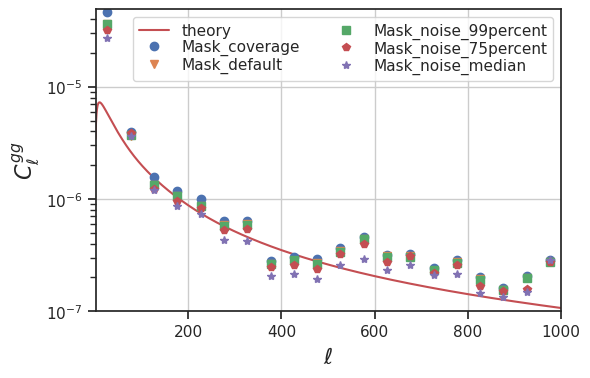

In [15]:
plot_many_data_correlations(experiments, 'gg', x_min=2, x_max=1000, y_min=1e-7, y_max=None, x_scale='linear', y_scale='log', legend_loc='upper right')

# gg: optical and non-optical scaling

params:
- 2 mJy: z_tail 1.3, bias 1.4

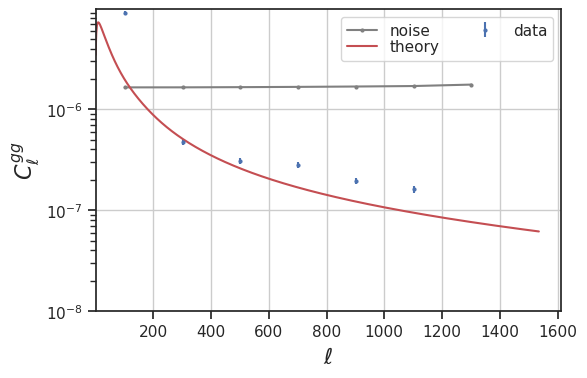

In [7]:
# with scaling, noise 75 percent, 2 mJy, proba mask, 200 bin
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

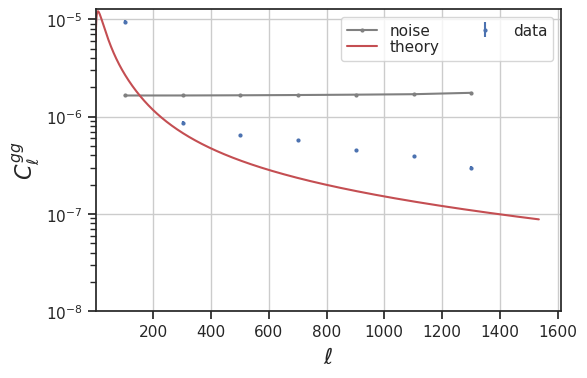

In [8]:
# without scaling, noise 75 percent, 2 mJy, proba mask, 200 bin
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log', is_raw=True)

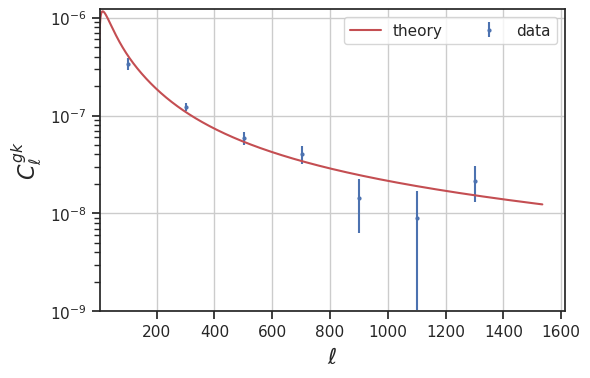

In [9]:
# noise 75 percent, 2 mJy, proba mask, 200 bin
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')

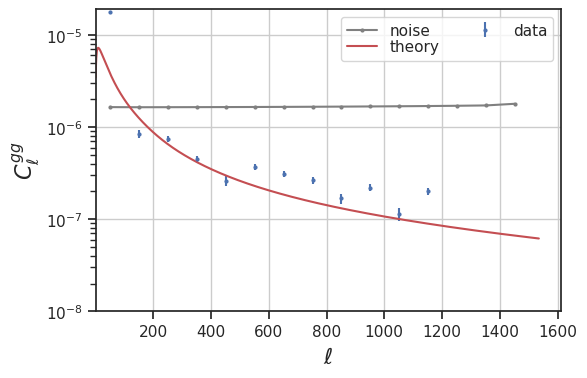

In [7]:
# with scaling, noise 75 percent, 2 mJy, proba mask, 100 bin
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

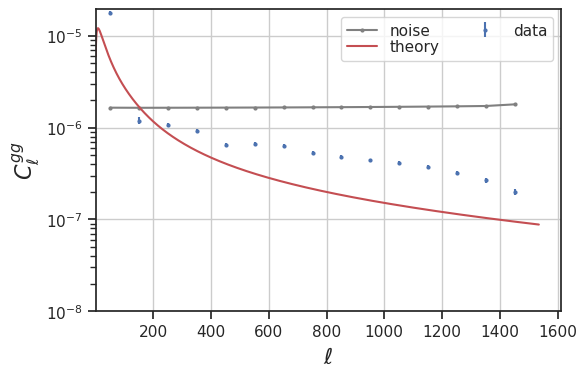

In [8]:
# without scaling, noise 75 percent, 2 mJy, proba mask, 100 bin
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log', is_raw=True)

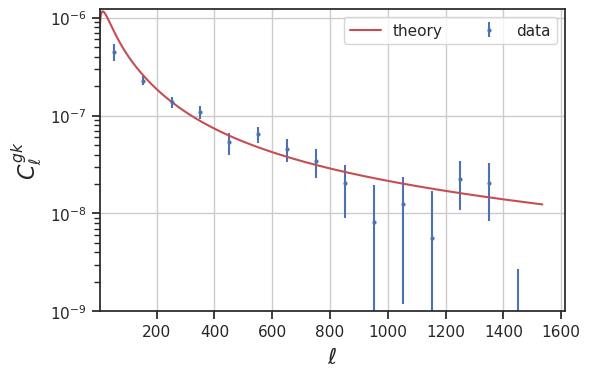

In [9]:
# noise 75 percent, 2 mJy, proba mask, 100 bin
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')

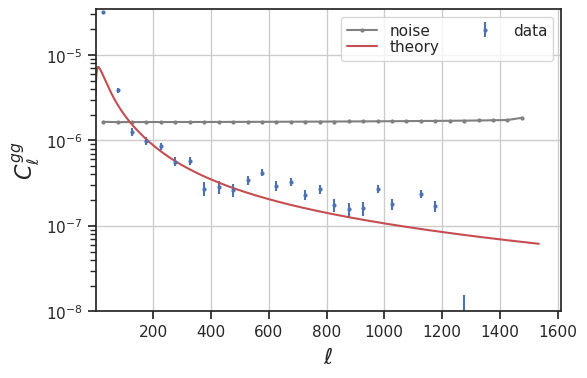

In [7]:
# with scaling, noise 75 percent, 2 mJy, proba mask, 50 bin
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

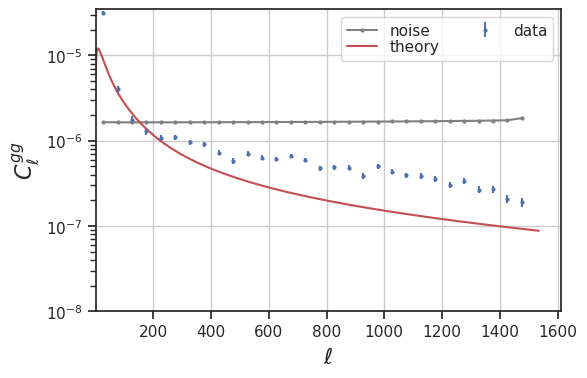

In [10]:
# without scaling, noise 75 percent, 2 mJy, proba mask, 50 bin
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log', is_raw=True)

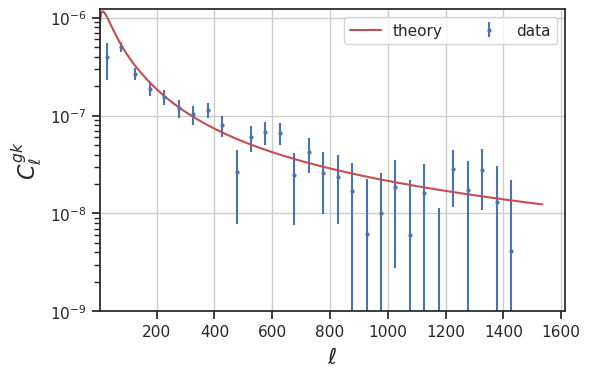

In [8]:
# noise 75 percent, 2 mJy, proba mask, 50 bin
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')

# Flux cuts and masks experiments - gT

In [7]:
params_to_update = {
#     'lss_mask_name': ['Mask_coverage', 'Mask_default', 'Mask_noise_99percent', 'Mask_noise_75percent', 'Mask_noise_median'],
#     'lss_mask_name': ['Mask_coverage', 'Mask_default'],
#     'lss_mask_name': ['Mask_noise_99percent', 'Mask_noise_75percent'],
    'lss_mask_name': ['Mask_noise_median'],
}
experiments = run_experiments(config, params_to_update, data_ready=True, maps_ready=False)

Original LoTSS DR2 datashape: (4395448, 24)
Total flux of S > 0.5 mJy: (3752487, 24)


  0%|          | 0/1 [00:00<?, ?it/s]

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 256
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format

data correlations:   0%|          | 0/2 [00:00<?, ?it/s]

covariance matrices:   0%|          | 0/3 [00:00<?, ?it/s]

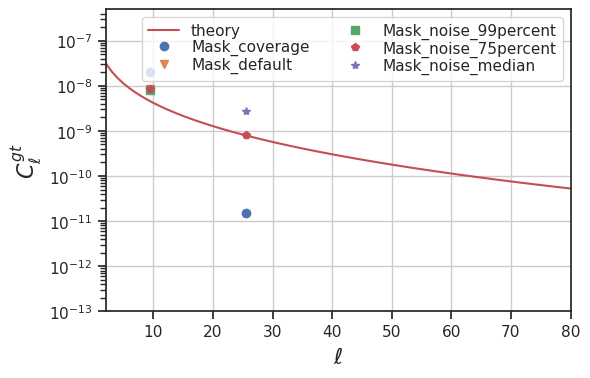

In [8]:
# 2 mJy
plot_many_data_correlations(experiments, 'gt', x_min=2, x_max=70, y_min=1e-12, y_max=None, x_scale='linear', y_scale='log')

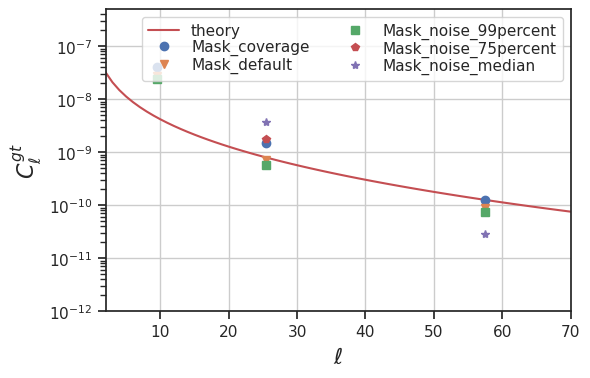

In [7]:
# 1 mJy
plot_many_data_correlations(experiments, 'gt', x_min=2, x_max=70, y_min=1e-12, y_max=None, x_scale='linear', y_scale='log')

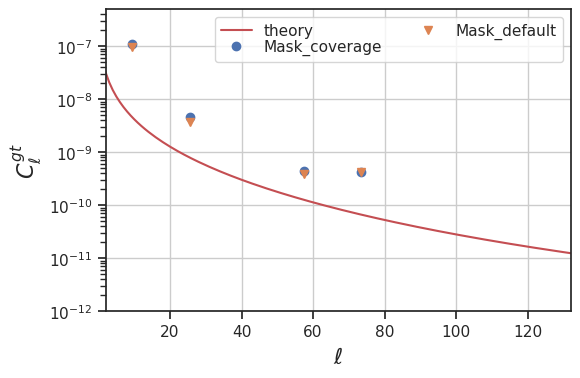

In [8]:
# 0.5 mJy
plot_many_data_correlations(experiments, 'gt', x_min=2, x_max=90, y_min=1e-11, y_max=None, x_scale='linear', y_scale='log')

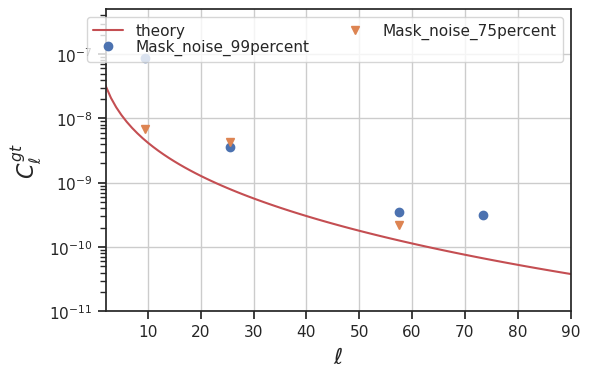

In [6]:
# 0.5 mJy
plot_many_data_correlations(experiments, 'gt', x_min=2, x_max=90, y_min=1e-11, y_max=None, x_scale='linear', y_scale='log')

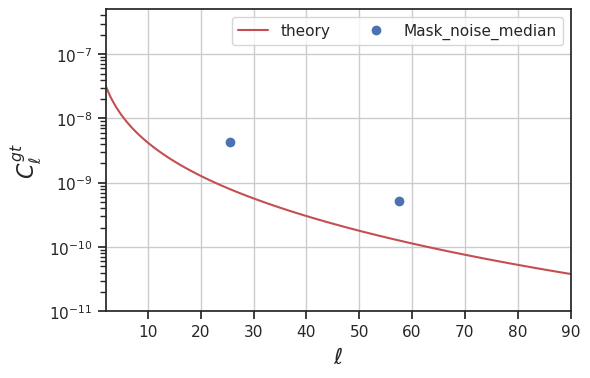

In [8]:
# 0.5 mJy
plot_many_data_correlations(experiments, 'gt', x_min=2, x_max=90, y_min=1e-11, y_max=None, x_scale='linear', y_scale='log')

# Binning experiments

In [5]:
display(config)

{'lss_survey_name': 'LoTSS_DR2',
 'lss_mask_name': 'Mask_noise_75percent',
 'flux_min_cut': 2,
 'nside': 512,
 'z_tail': 1.0,
 'bias': 1.3,
 'scale_bias': True,
 'cosmology_name': 'planck',
 'cosmology_matter_power_spectrum': 'halofit',
 'correlation_symbols': ['gg', 'gk'],
 'l_max': {'gg': 510, 'gk': 510},
 'ells_per_bin': {'gg': 50, 'gk': 50},
 'starting_params': {'bias': [2.1, 0.5], 'sigma8': [0.83, 0.1]},
 'n_walkers': 32,
 'max_iterations': 5000,
 'continue_sampling': False}

In [7]:
ells_per_bin_arr = [2, 4, 8, 16, 32, 50, 64, 128]
params_to_update = {'ells_per_bin': [{'gg': ells_per_bin, 'gk': ells_per_bin} for ells_per_bin in ells_per_bin_arr]}

experiments = run_experiments(config, params_to_update, pre_data=True, pre_maps=True)

Original LoTSS DR2 datashape: (4395448, 24)
Total flux of S > 2mJy: (1062278, 24)


/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 256
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format

  0%|          | 0/8 [00:00<?, ?it/s]

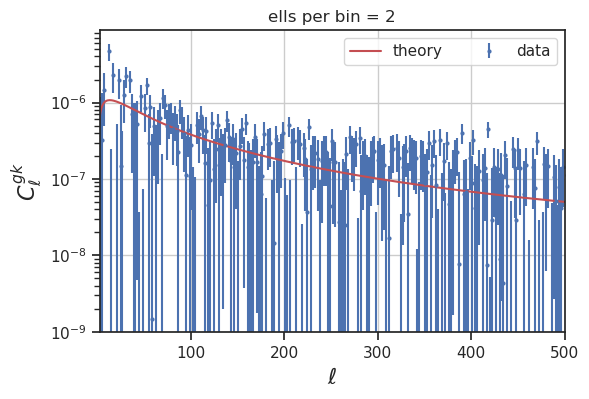

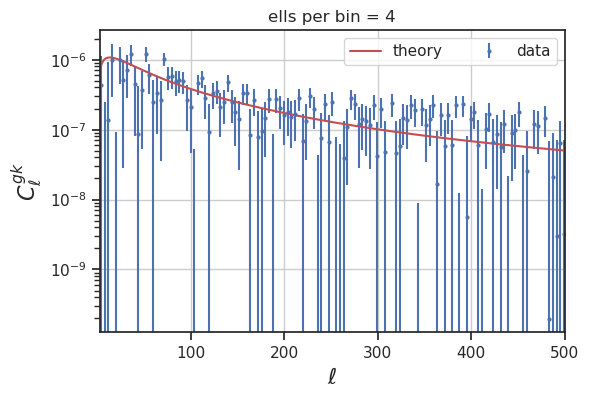

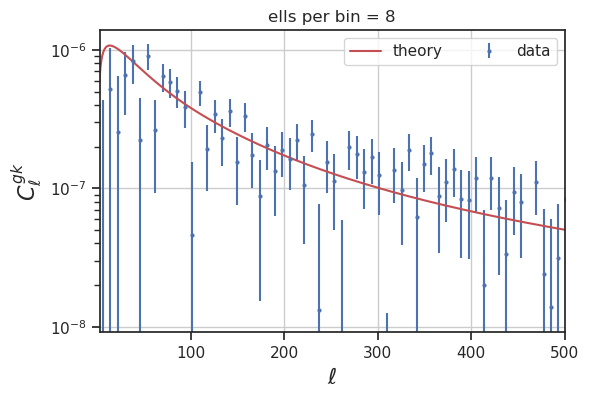

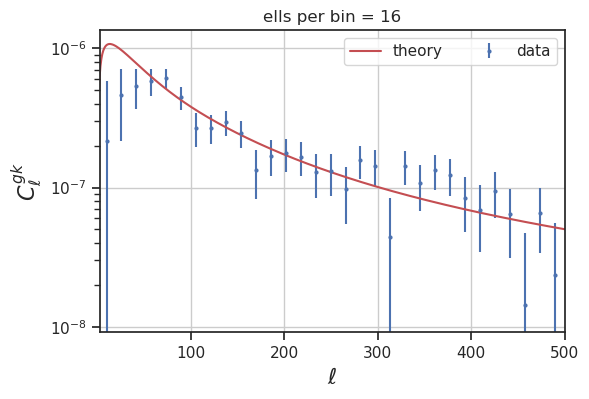

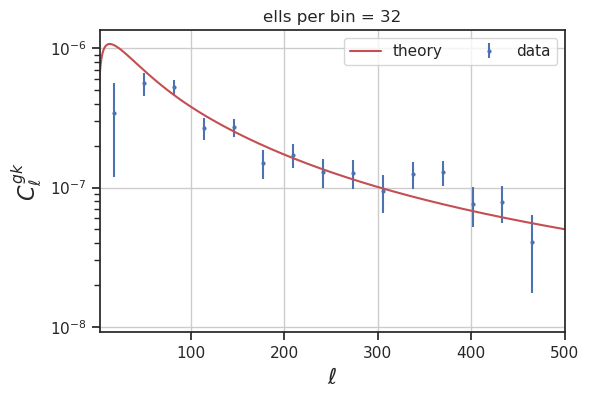

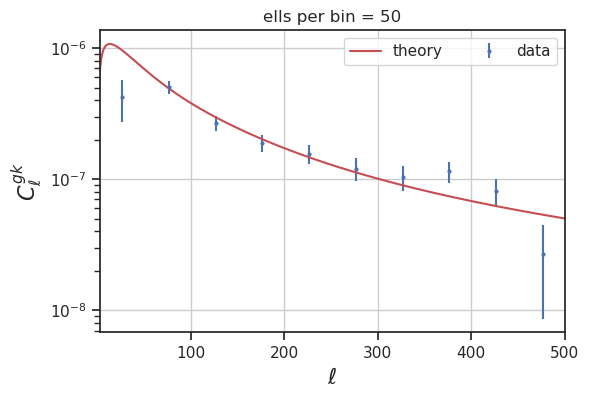

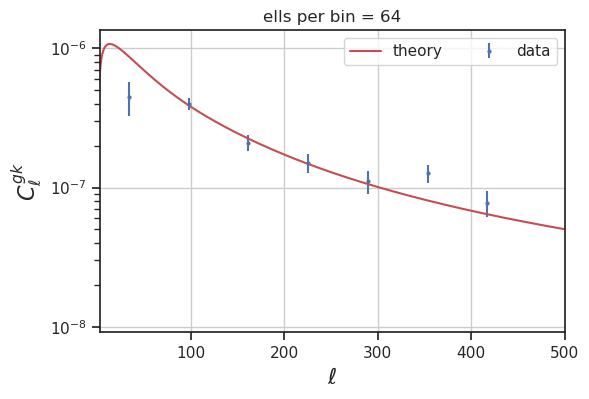

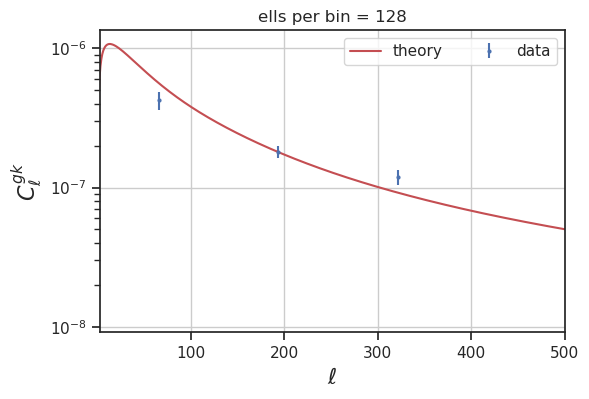

In [9]:
for ells_per_bin, experiment in experiments.items():
    title = 'ells per bin = {}'.format(ells_per_bin)
    plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=None, y_max=None, x_scale='linear', y_scale='log', with_error=True, title=title)

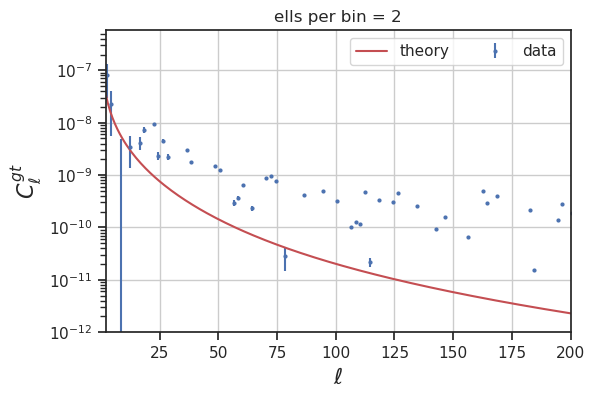

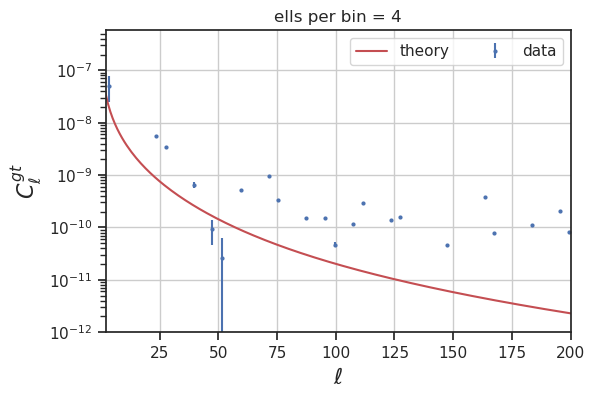

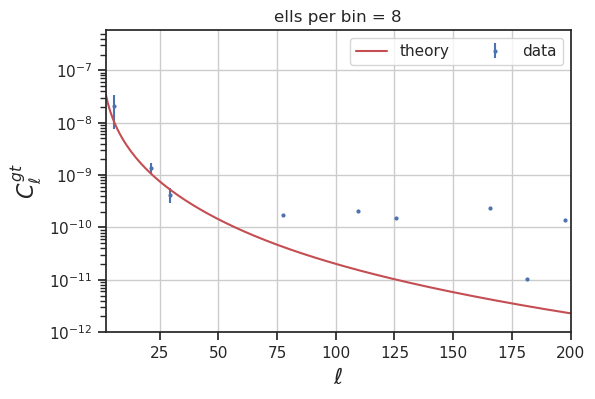

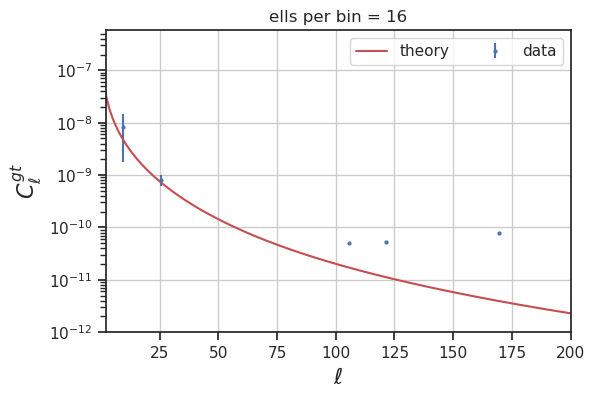

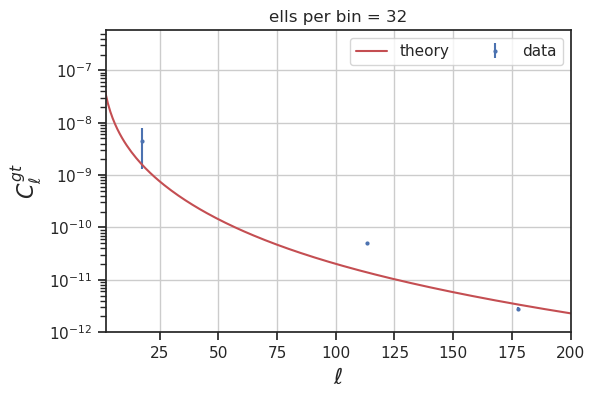

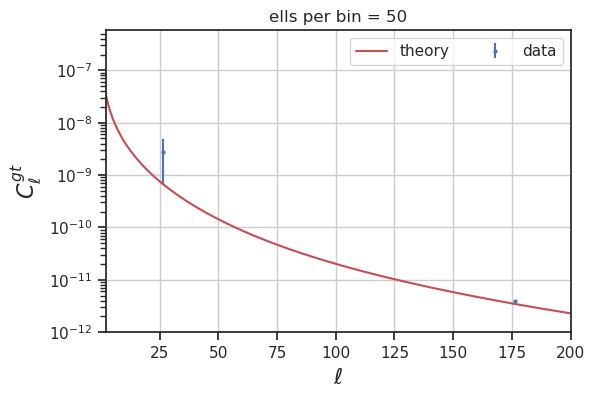

In [7]:
for ells_per_bin, experiment in experiments.items():
    title = 'ells per bin = {}'.format(ells_per_bin)
    plot_correlation(experiment, 'gt', x_min=2, x_max=200, y_min=1e-12, y_max=None, x_scale='linear', y_scale='log', with_error=True, title=title)

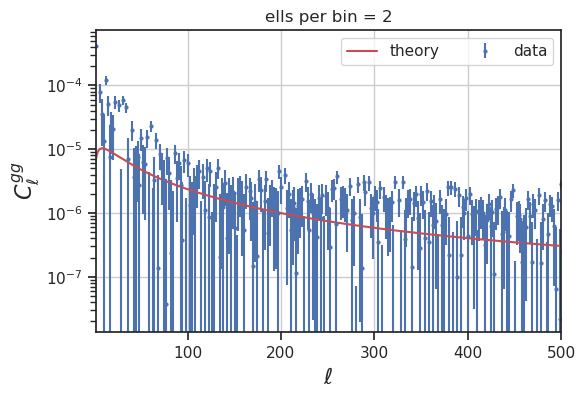

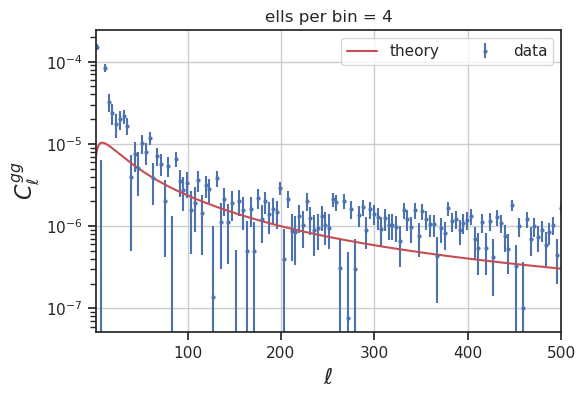

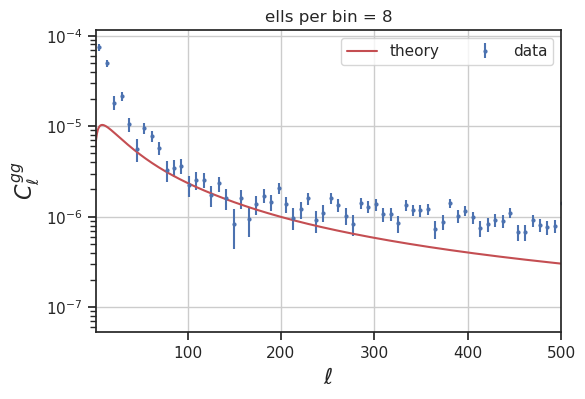

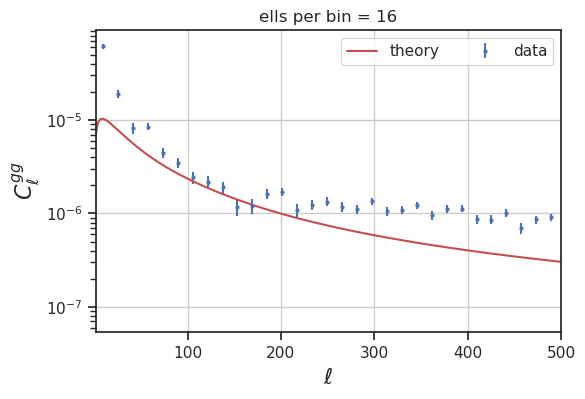

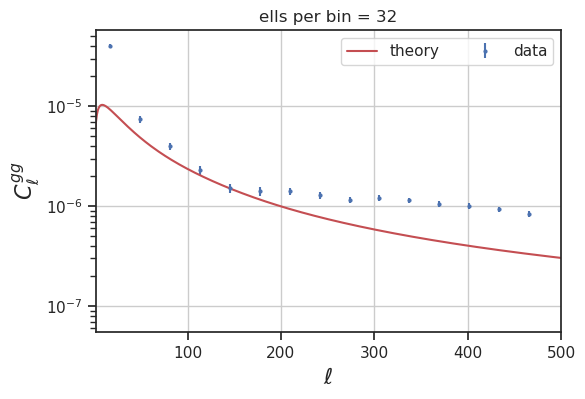

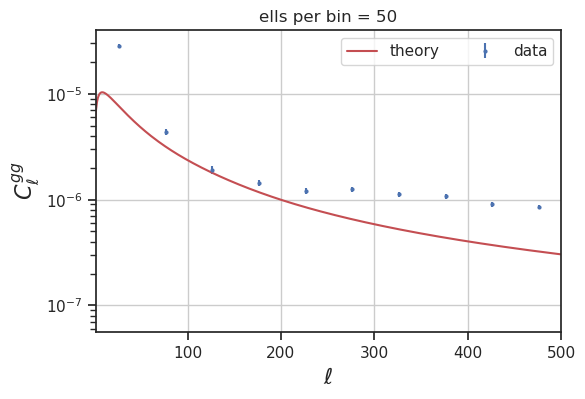

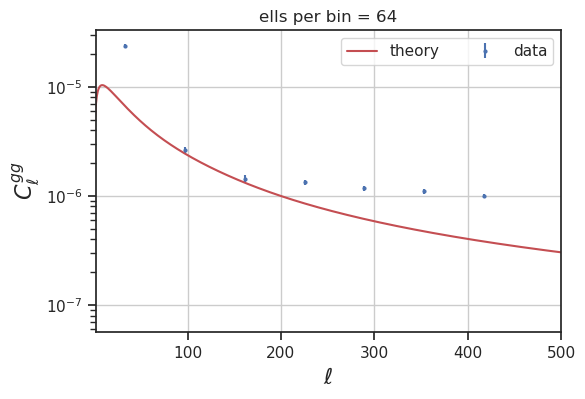

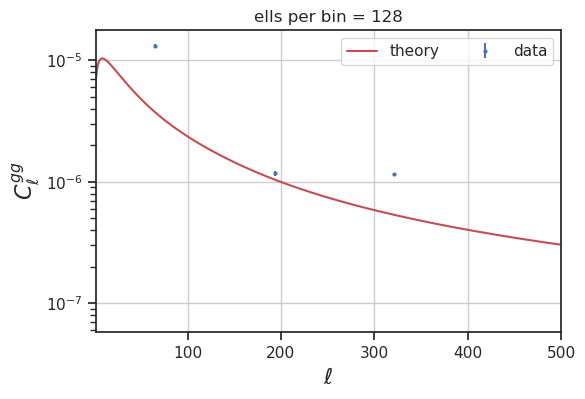

In [8]:
for ells_per_bin, experiment in experiments.items():
    title = 'ells per bin = {}'.format(ells_per_bin)
    plot_correlation(experiment, 'gg', x_min=2, x_max=500, y_min=None, y_max=None, x_scale='linear', y_scale='log', with_error=True, title=title)

# Redshift distribution

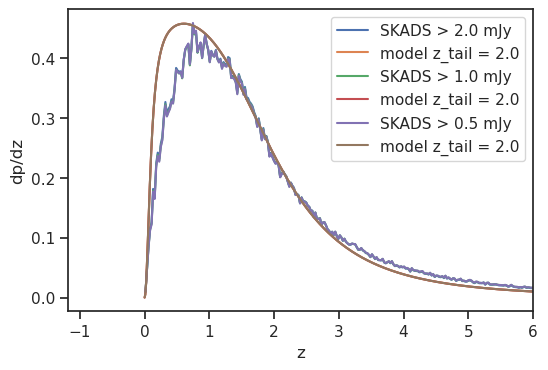

In [9]:
# flux cut, z tail pairs
to_plot = [(2.0, 2.0), (1.0, 2.0), (0.5, 2.0)]

skads = get_skads_sim_data()

for flux_cut, z_tail in to_plot:

    z_arr, z_proba_arr, _ = get_normalized_dist(skads.loc[skads['S_144'] > flux_cut]['redshift'])

    plt.plot(z_arr, z_proba_arr, label='SKADS > {} mJy'.format(flux_cut))

    z_arr, n_arr = get_lotss_redshift_distribution(z_tail=z_tail, z_max=6)
    area = simps(n_arr, dx=z_arr[1] - z_arr[0])
    n_arr /= area

    plt.plot(z_arr, n_arr, label='model z_tail = {}'.format(z_tail))

plt.xlim(right=6)
plt.xlabel('z')
plt.ylabel('dp/dz')
plt.legend()
plt.show()

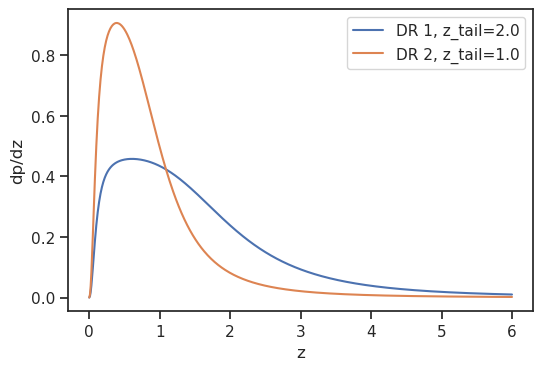

In [6]:
to_plot = [('DR 1', 2.0), ('DR 2', 1.0)]
for z_dist_name, z_tail in to_plot:
    z_arr, n_arr = get_lotss_redshift_distribution(z_tail=z_tail, z_max=6)
    area = simps(n_arr, dx=z_arr[1] - z_arr[0])
    plt.plot(z_arr, n_arr / area, label='{}, z_tail={}'.format(z_dist_name, z_tail))

plt.xlabel('z')
plt.ylabel('dp/dz')
plt.legend()
plt.show()

# Data

In [9]:
%matplotlib widget
my_mollview(experiment.masks['g'], unit='overdensity', fwhm=0, zoom=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [16]:
%matplotlib widget
my_mollview(experiment.base_maps['g'], unit='counts', fwhm=0, zoom=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
%matplotlib widget
my_mollview(experiment.base_maps['g'], unit='counts', fwhm=0, zoom=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  **kwds
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:543: UserWarning: 0.0 180.0 -180.0 180.0
  pmin / dtor, pmax / dtor, mmin / dtor, mmax / dtor
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:658: UserWarning: The interval between parallels is 30 deg -0.00'.
  vdeg, varcmin
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:666: UserWarning: The interval between meridians is 30 deg -0.00'.
  vdeg, varcmin
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:543: UserWarning: 82.97611575271

In [18]:
%matplotlib widget
my_mollview(experiment.base_maps['g'], unit='overdensity', fwhm=0.2, zoom=True)

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 5.095931 arcmin (0.001482 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 12.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 35.671516 arcmin (0.010376 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 84.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and wil

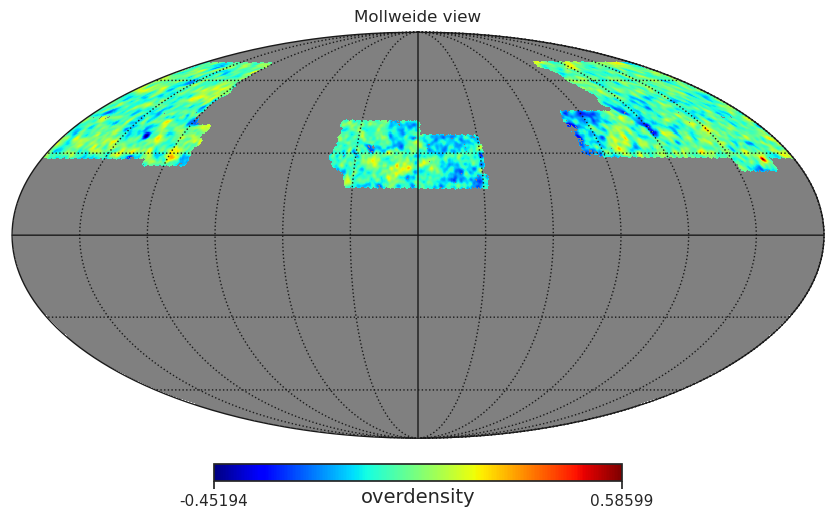

In [11]:
my_mollview(experiment.processed_maps['g'], unit='overdensity', fwhm=1.4)

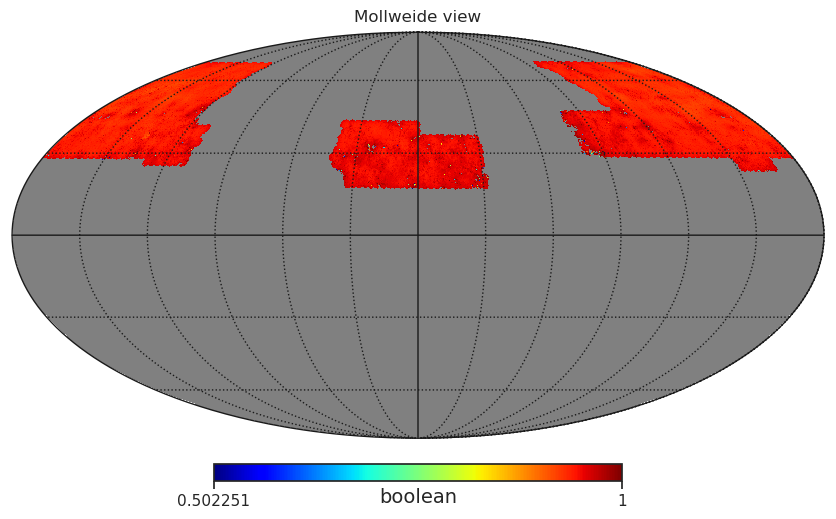

In [12]:
my_mollview(experiment.masks['g'], unit='boolean', fwhm=0)

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 40.767446 arcmin (0.011859 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 96.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


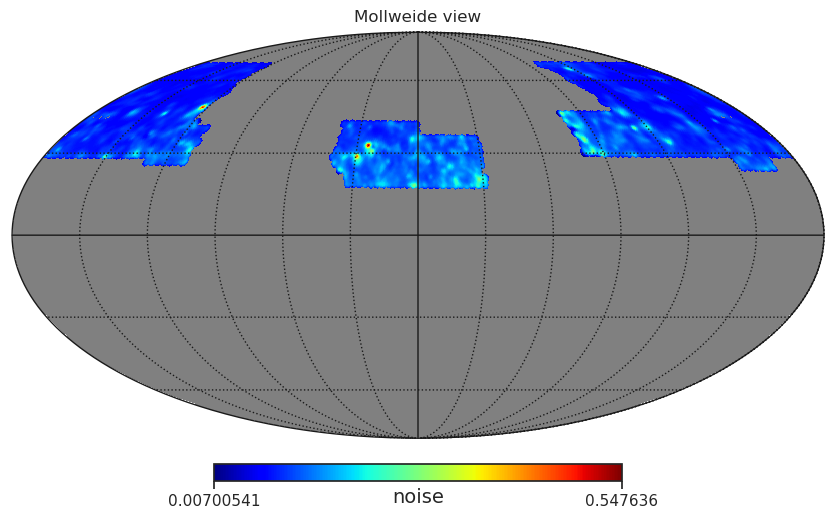

In [13]:
my_mollview(experiment.noise_maps['g'], unit='noise', fwhm=1.6)

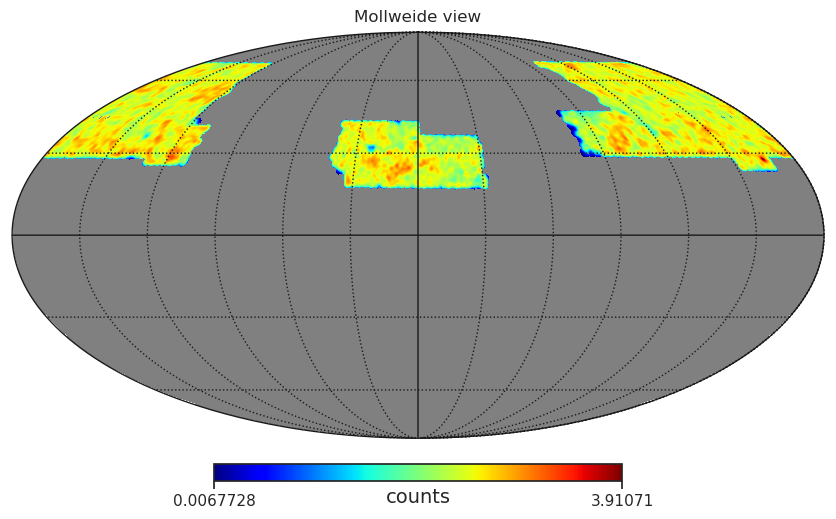

In [14]:
my_mollview(experiment.base_maps['g'], unit='counts', fwhm=1.4)

In [9]:
my_mollview(experiment.processed_maps['t'], unit='mK', fwhm=1.2)

KeyError: 't'

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 15.287792 arcmin (0.004447 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 36.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


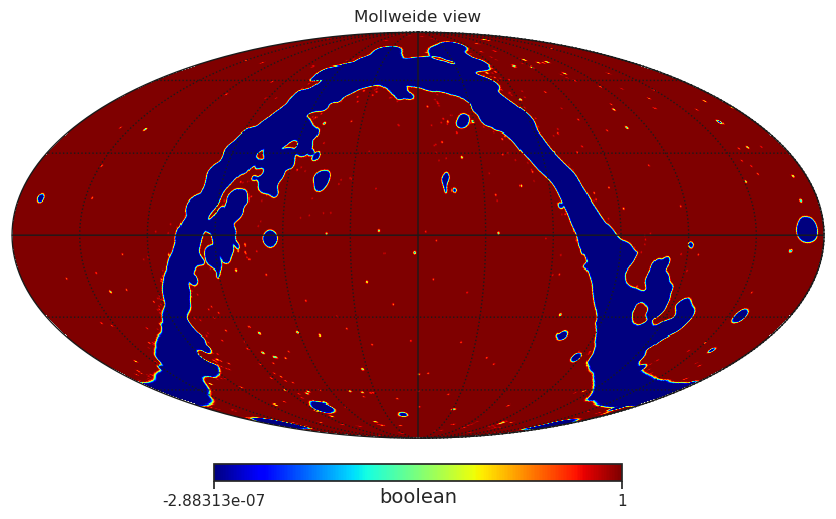

In [11]:
my_mollview(experiment.masks['t'], unit='boolean', fwhm=0.6)

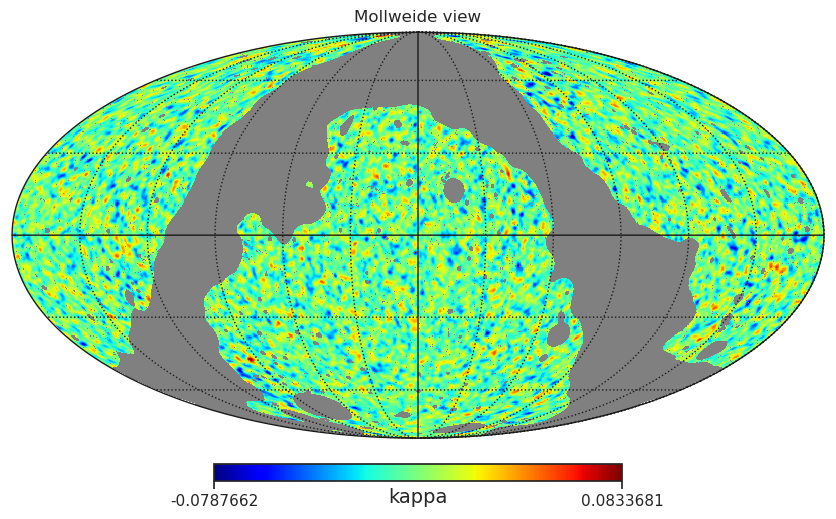

In [15]:
my_mollview(experiment.processed_maps['k'], unit='kappa', fwhm=1.6)

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 20.383723 arcmin (0.005929 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 48.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


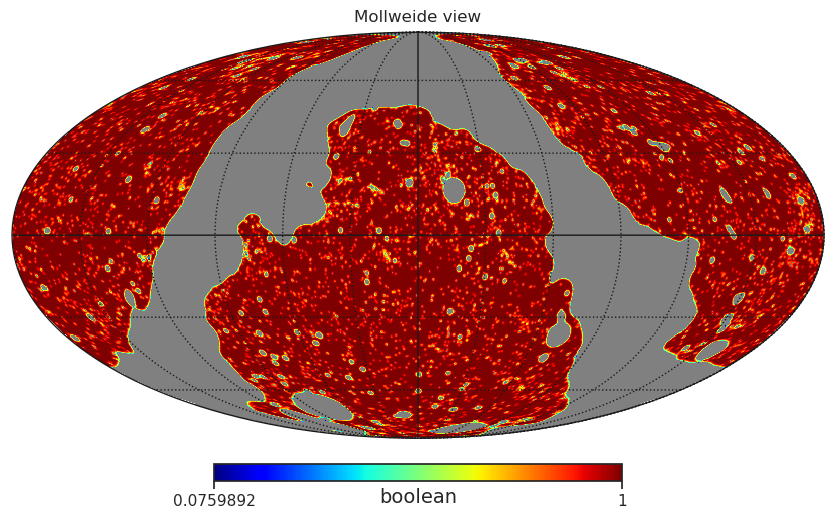

In [16]:
my_mollview(experiment.masks['k'], unit='boolean', fwhm=0.8)